### Polynomial regression in practice
	
	
1. Implement a function in Python that computes (and outputs) the polynomial data matrix $\Phi(X)$ defined as
$$
\begin{align*}
\Phi(X) := \left( \begin{matrix}
1 & x_1 & \cdots & x_1^d \\
1 & x_2 & \cdots & x_2^d \\
\vdots & \vdots & & \vdots\\
1 & x_s & \cdots & x_s^d \\
\end{matrix} \right)
\end{align*}
$$

for $s$ inputs $\{ x_i \}_{i = 1}^s$. The function call should be of the form $\texttt{polynomial_basis(inputs, degree)}$, where $\texttt{inputs}$ is a $\href{https://numpy.org}{NumPy}$ array of inputs $x_1, \ldots, x_s$ and $\texttt{degree}$ is the degree of the polynomial. 
        
2. $\label{ex:samples}$ Generate $s$ equidistant inputs $\{ x_i \}_{i = 1}^s$ in the interval $[0, 1]$ with the NumPy-command $\href{https://numpy.org/doc/stable/reference/generated/numpy.linspace.html}{\texttt{linspace}}$. 

3. Create two polynomial basis matrices with the inputs from Exercise $\ref{ex:samples}$ and degrees $d = 1$ and $d = 3$.
4. Apply your matrices to the weights 
$
w_1 = 
\left( 
\begin{matrix}
2/5 & -4/5
\end{matrix} 
\right)^\top
$ 
and 
$
w_3 = 
\left( 
\begin{matrix}
0 & 32/3 & -32 & 64/3
\end{matrix} 
\right)^\top$ 
and store your results in arrays $\texttt{y1}$ and $\texttt{y3}$. Visualise your results with tools from the $\href{https://matplotlib.org}{Matplotlib}$-library.
        
5. Write a function $\texttt{polynomial_regression}$ that takes two arguments $\texttt{data_matrix}$ and $\texttt{data_samples}$, which computes and returns the solution $\hat w$ of the normal equation $\Phi(X)^\top \Phi(X) \hat w = \Phi(X) y$. Here $\Phi(X)$ is the mathematical representation of $\texttt{data_matrix}$ and $y$ is the mathematical representation of $\texttt{data_samples}$. $\textbf{Hint}$: make us of NumPy's function $\href{https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html}{\texttt{linalg.solve}}$.

6. Test your function $\texttt{polynomial_regression}$ by computing weights for the degrees $d = 1$ and data $\texttt{y1}$, and $d = 3$ and data $\texttt{y3}$.

We begin by loading the NumPy and Matplotlib libraries and by setting the random seed to a fixed value.

In [1]:
## load all modules
import numpy as np ## module for mathematical opertaions
import matplotlib.pyplot as plt ## module for drawing 
%matplotlib inline 
## the output of plotting commands is displayed inline within the output, 
## directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

1. Here we define the function $\texttt{polynomial_basis}$. We first perform some input checks, to be sure that the data is of an appropriate type and size, and then evaluate the matrix $\Phi\left(X\right)$.

In [2]:
def polynomial_basis(inputs, degree):        
    ## defining the matrix Phi_X to be a column of ones
    Phi_X = np.ones((len(inputs), 1))
    
    for counter in range(1, degree + 1):
        Phi_X = np.c_[Phi_X, np.power(inputs, counter)] ## filling Phi_X column by column with power of inputs values
    return Phi_X

2. Here we generate $s = 101$ equidistant inputs $\{ x_i \}_{i = 1}^s$ in the interval $[0, 1]$ with the NumPy-command $\href{https://numpy.org/doc/stable/reference/generated/numpy.linspace.html}{\texttt{linspace}}$. the value of $s$ can be easily changed.

In [3]:
s = 101 #defining the number of grid points
polynomial_data_x = np.linspace(0, 1, s) #defining points themselves

3. Here we create two polynomial basis matrices with equidistant nodes and degrees $d = 1$ and $d = 3$.

In [4]:
d1 = 1
d3 = 3
Phi_X_d1 = polynomial_basis(polynomial_data_x,d1)
Phi_X_d3 = polynomial_basis(polynomial_data_x,d3)

4. Now we apply our basis matrices to a given weights and store the results in arrays $\texttt{y1}$ and $\texttt{y3}$. Then we visualise the results with tools from the $\href{https://matplotlib.org}{Matplotlib}$-library.

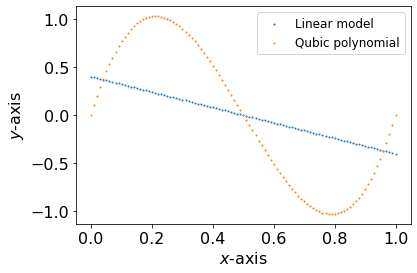

In [5]:
#defining weights/coefficients
w1 = np.array([0.4, -0.8]).T
w3 = np.array([0, 32/3, -32, 64/3]).T

#calculating the outputs
y1 =  Phi_X_d1 @ w1 
y3 =  Phi_X_d3 @ w3

plt.scatter(polynomial_data_x, y1, s=1, label='Linear model')#building scatter plot of "linear" data
plt.scatter(polynomial_data_x, y3, s=1, label='Qubic polynomial')#building scatter plot of "qubic" data

#defining the layout
plt.legend( prop={'size': 12})
plt.xlabel('$x$-axis', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('$y$-axis', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout;

5. In this part we write a function that solves a regression problem based on two arguments $\texttt{data_matrix}$ and $\texttt{data_samples}$.

In [6]:
def polynomial_regression(data_matrix, data_samples):
    gramm_matrix = data_matrix.T @ data_matrix # calculating Phi^T.Phi matrix
    right_hand_side = data_matrix.T @ data_samples #calculating Phi^T.Y matrix
    w = np.linalg.solve(gramm_matrix, right_hand_side).reshape(-1)    
    return w

6. Finally we test the function $\texttt{polynomial_regression}$ by computing weights for the degrees $d = 1$ and data $\texttt{y1}$, and $d = 3$ and data $\texttt{y3}$. This should coincide with the weights we have earlier defined. 

In [7]:
w1_calculated = polynomial_regression(Phi_X_d1,y1)
w3_calculated = polynomial_regression(Phi_X_d3,y3)
print('For d=1 the difference between original weights and the calculated ones is %1.3f.' %np.linalg.norm(w1-w1_calculated))
print('For d=3 the difference between original weights and the calculated ones is %1.3f.' %np.linalg.norm(w3-w3_calculated))

For d=1 the difference between original weights and the calculated ones is 0.000.
For d=3 the difference between original weights and the calculated ones is 0.000.


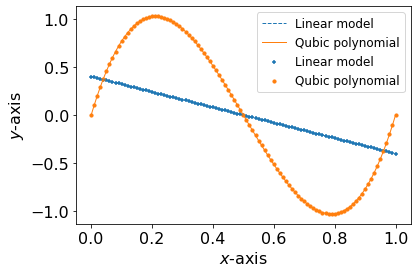

In [8]:
y1_calculated =  Phi_X_d1 @ w1_calculated #calculating the outputs
y3_calculated =  Phi_X_d3 @ w3_calculated


plt.plot(polynomial_data_x, y1_calculated, '--', linewidth = 1, label='Linear model')#building a plot of "linear" regression
plt.plot(polynomial_data_x, y3_calculated, '-',  linewidth = 1, label='Qubic polynomial')#building a plot of "qubic" regression

plt.scatter(polynomial_data_x, y1, s=10, marker = '+', label='Linear model')#building scatter plot of "linear" data
plt.scatter(polynomial_data_x, y3, s=10, marker = 'o', label='Qubic polynomial')#building scatter plot of "qubic" data

#defining the layout
plt.legend( prop={'size': 12})
plt.xlabel('$x$-axis', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('$y$-axis', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout;

### Ridge regression in practice
	
1. Implement a function $\texttt{noisy_sin(size, variance)}$ that creates your own dataset.	This is generated by defining a function $f(x) := \sin(2 \pi x)$, by sampling the function at points $\{ x_i \}_{i = 1}^s$ from the interval $[0, 1]$, where $s=\texttt{size}$, and by computing corresponding output samples $y_i = f(x_i)$ for all $i \in \{1, \ldots, s\}$. Perturb your data with normal distributed random noise with mean zero and variance $\sigma^2 = \texttt{variance}$ in order to obtain noisy, simulated output data samples $\{ y_i\}_{i = 1}^s$. 
		
2. Visualise your data points for $\texttt{size} = 100$ and $\texttt{variance} = 0.01$.
		
3. Write a function $\texttt{ridge_regression}$ that takes three arguments $\texttt{data_x}$, $\texttt{data_y}$ and $\texttt{alpha}$, which computes and returns the solution $w_{\alpha}$ of the normal equation $\left(X^\top X+\alpha I\right) w^{\alpha} = X^{\top} y$. Here $X$ is the mathematical representation of $\texttt{data_x}$ and $y$ is the mathematical representation of $\texttt{data_y}$. $\textbf{Hint}$: make us of NumPy's function $\href{https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html}{\texttt{linalg.solve}}$.
		
4. $\label{ex:test}$ Split the dataset you have generated into two sets; one for training, and one for validation. The training set should contain $80\%$ randomly selected sample pairs, while the set for validation contains the remaining $20\%$.
		
5. Generate $K = 10$ equidistant inputs $\Pi = \alpha_1,\ldots,\alpha_K$ in the interval $[1, 10]$ with the NumPy-command $\href{https://numpy.org/doc/stable/reference/generated/numpy.linspace.html}{\texttt{linspace}}$.  For each value $\alpha_i \in \Pi$ run the	$\texttt{ridge_regression}$ function, using the training data evaluated before, to evaluate $w^{\alpha}$. Evaluate the validation error 
$$
\begin{align*}
\text{Val}_{S_v}(\alpha) = \frac{1}{2|S_v|} \sum_{(x_i, y_i) \in S_v} | w^{\alpha}_0+w^{\alpha}_1x_i - y_i |^2.
\end{align*}
$$
between output samples $\{ y_i^v \}_{i = 1}^{|S_v|}$ from a validation data set $S_v$ and the outputs of the ridge regression function. Here $|S_v|$ denotes the number of samples in the validation set $S_v$. Plot the validation error $\text{Val}_{S_v}(\alpha)$ versus the value of $\alpha$.

6. Find the value $\hat \alpha = \arg\min_{\alpha \in \Pi}\text{Val}_{S_v}(\alpha)$.

We first load all modules. This is not needed if we use the same notebook for the problems, but here we try to present independent solutions for each problem.

In [9]:
## load all modules
import numpy as np ## module for mathematical opertaions
import matplotlib.pyplot as plt ## module for drawing 
%matplotlib inline 
## the output of plotting commands is displayed inline within the output, 
## directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
np.random.seed(13) ## fix the random seed

1. We first implement a function that creates your own dataset.

In [10]:
def noisy_sin(size, variance):
    inputs = np.linspace(0, 1, size) #create x coordinates of data points
    true_outputs = np.sin(2*np.pi*inputs) #evaluate y coordinates of data points
    outputs = true_outputs + np.sqrt(variance) * np.random.randn(size) #add a noise to y coordinates of data points
    return inputs, outputs 

2. Visualise your data points for $\texttt{size} = 100$ and $\texttt{variance} = 0.01$.

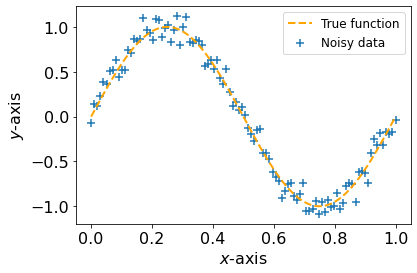

In [11]:
size = 100
variance = 0.01
sin_data_x, sin_data_y = noisy_sin(size, variance)

plt.scatter(sin_data_x, sin_data_y, s=50, marker = '+', label='Noisy data')#building scatter plot of noisy data
plt.plot(sin_data_x, np.sin(2*np.pi*sin_data_x),'--',linewidth = 2, color='orange', label = 'True function')#building a true function

#defining the layout
plt.legend( prop={'size': 12})
plt.xlabel('$x$-axis', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('$y$-axis', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout;

3. Here we write a function, which computes and returns the solution $w_{\alpha}$ of the normal equation of ridge regression problem.

In [12]:
def ridge_regression(data_x, data_y, alpha):    
    X_matrix = polynomial_basis(data_x,1)
    gramm_matrix = X_matrix.T@ X_matrix + alpha*np.ones(2)
    right_hand_side = X_matrix.T @ data_y
    return np.linalg.solve(gramm_matrix, right_hand_side)

4. $\label{ex:test}$ Split the dataset you have generated into two sets; one for training, and one for validation. The training set should contain $80\%$ randomly selected sample pairs, while the set for validation contains the remaining $20\%$.

In [13]:
def split_data(inputs, outputs, inputs_ratio):    
    #evaluating the number of elements that should go to training data
    s = len(inputs)
    T = int(inputs_ratio * s)
    
    #forming a range of all indices from 0 to s-1 and shuffling them
    indices = np.arange(s)
    np.random.shuffle(indices)
    
    indices_V = indices[T:]#Validation data consist of data points with indeces that belong to the last s-T indices in a shuffled list
    indices_T = indices[:T]#Training data consist of data points with indeces that belong to the fist T indices in a shuffled list
    training_data = [inputs[indices_T],outputs[indices_T]]
    validation_data = [inputs[indices_V],outputs[indices_V]]
    return training_data, validation_data

In [14]:
training_data, validation_data = split_data(sin_data_x,sin_data_y,0.8)

5. Now we Generate $K = 10$ equidistant values of $\alpha$ in the interval $[1, 10]$ and for each value $\alpha$ run the	$\texttt{ridge_regression}$ function and evaluate the validation error. We later plot the validation error $\text{Val}_{S_v}(\alpha)$ versus the value of $\alpha$.

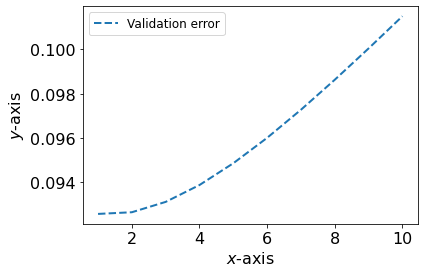

In [15]:
def error_measure(true_value, regression_value):
    return (true_value-regression_value)**2

def ridge_validation_error(inputs, outputs, w):        
    s = len(inputs)
    error = 0
    data_matrix = polynomial_basis(inputs,1)
    
    for counter in range(s):
        error += error_measure((data_matrix@w)[counter], outputs[counter])
        
    error /= 2*s
    return error

K = 10
alpha_grid = np.linspace(1,10,K)
validation_errors = []

for alpha in alpha_grid:
    w = ridge_regression(training_data[0],training_data[1],float(alpha))    
    validation_errors.append(ridge_validation_error(validation_data[0],validation_data[1],w))

    
plt.plot(alpha_grid, validation_errors, '--', linewidth = 2, label='Validation error')#building a plot of validation error

#defining the layout
plt.legend( prop={'size': 12})
plt.xlabel('$x$-axis', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('$y$-axis', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout;

6. Find the value $\hat \alpha = \arg\min_{\alpha \in \Pi}\text{Val}_{S_v}(\alpha)$.

By checking the values of validation error, one can see that the minimum validation error is obtained for $\alpha = 2$. We can also redraw the plot by magnifying it around $\alpha \in \left[1,2\right]$

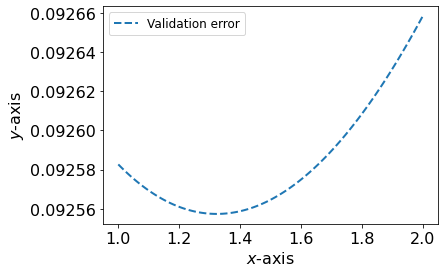

In [16]:
K = 100
alpha_grid = np.linspace(1,2,K)
validation_errors = []

for alpha in alpha_grid:
    w = ridge_regression(training_data[0],training_data[1],float(alpha))
    validation_errors.append(ridge_validation_error(validation_data[0],validation_data[1],w))

    
plt.plot(alpha_grid, validation_errors, '--', linewidth = 2, label='Validation error')#building a plot of validation error

#defining the layout
plt.legend( prop={'size': 12})
plt.xlabel('$x$-axis', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('$y$-axis', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout;

This shows that the minimum is attained at around $\alpha = 1.3$. Let us take this value and evaluate the coefficients of the ridge regression.

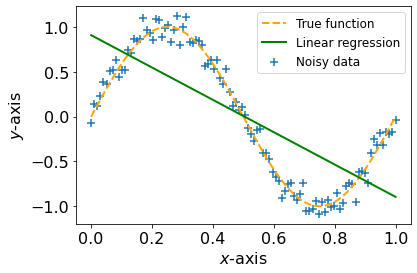

In [17]:
w = ridge_regression(training_data[0],training_data[1],1.3)

plt.scatter(sin_data_x, sin_data_y, s=50, marker = '+', label='Noisy data')#building scatter plot of noisy data
plt.plot(sin_data_x, np.sin(2*np.pi*sin_data_x),'--',linewidth = 2, color='orange', label = 'True function')#building a true function
plt.plot(sin_data_x, polynomial_basis(sin_data_x,1)@w,'-',linewidth = 2, color='green', label = 'Linear regression')#building a linear regression

#defining the layout
plt.legend( prop={'size': 12})
plt.xlabel('$x$-axis', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('$y$-axis', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout;

### Optimization of polynomial regression in practice
In this exercise we implement a polynomial regression with the search for an optimal polynomial degree.	You will use the data generator implemented above in $\texttt{noisy_sin(size, variance)}$ together	with the polynomial regression implemented in $\texttt{polynomial_regression}$.
	
Similar to the previous problem you will first need to generate the data points and split it into training and validation data with the same ratio.
	
1. Implement a grid-search strategy that evaluates the validation error 
$$
\begin{align*}
\text{Val}_{S_v}(d) = \frac{1}{2|S_v|} \sum_{(x_i, y_i) \in S_v} | f_d(x_i) - y_i |^2 \, ,
\end{align*}
$$
between output samples $\{ y_i^v \}_{i = 1}^{|S_v|}$ from a validation data set $S_v$ and the outputs of the polynomial regression function $f_d$ from $\texttt{polynomial_regression}$. The parameter that is being evaluated on a grid is the degree $d$ of the polynomial. Here $|S_v|$ denotes the number of samples in the validation set $S_v$.
		
2. Apply the model with degree $d$ for which you obtained the best results in the previous exercise and apply it to the whole data generated in from Exercise $\ref{ex:test}$. Visualise the true function $f$, the test samples and your polynomial function $f_t$. 

We first split the data into test data and validation data.

In [18]:
np.random.seed(15)
polynomial_training_data, polynomial_validation_data = split_data(sin_data_x,sin_data_y,0.8)

1. We now define a grid for the values of degree $d$ of the polynomial and evaluate the validation error for each $d$. We later plot the validation error against $d$.

In [19]:
def polynomial_validation_error(matrix_inputs, outputs, w, degree):
    
    s = matrix_inputs.shape[0]
    error = 0
    
    for counter in range(s):
        error += error_measure((matrix_inputs @ w)[counter], outputs[counter])        
    error /= 2*s
    
    return error

The best fit happens with d = 10. The minimal validation error in this case is 0.006


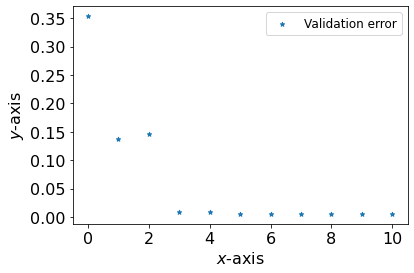

In [20]:
Max_d = 10
degree_grid = np.arange(0,Max_d+1)
validation_errors = []

for degree in degree_grid:
    Phi_X_d = polynomial_basis(polynomial_training_data[0], degree)
    w = polynomial_regression(Phi_X_d, polynomial_training_data[1])
    validation_Phi_X_d = polynomial_basis(polynomial_validation_data[0], degree)
    validation_errors.append(polynomial_validation_error(validation_Phi_X_d,polynomial_validation_data[1],w,degree))


optimal_degree = degree_grid[np.argmin(validation_errors)]
optimal_error = validation_errors[np.argmin(validation_errors)]
optimal_parameters = polynomial_regression(polynomial_basis(polynomial_training_data[0], optimal_degree), polynomial_training_data[1])
print('The best fit happens with d = %d. The minimal validation error in this case is %1.3f' %(optimal_degree,optimal_error))    
    
plt.scatter(degree_grid, validation_errors, marker = '*', s = 20, label='Validation error')#building a plot of validation error

#defining the layout
plt.legend( prop={'size': 12})
plt.xlabel('$x$-axis', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('$y$-axis', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout;

2. Here we apply the model with degree $\texttt{optimal_degree}$ that we have found above and visualise the true function $f$, the test samples and polynomial function $f_t$. 

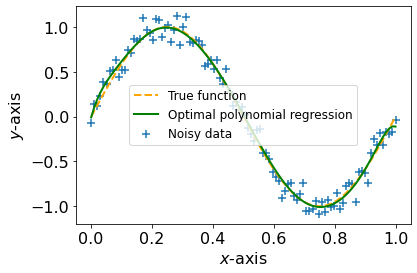

In [21]:
Phi_X = polynomial_basis(sin_data_x,optimal_degree)
model_outputs = Phi_X @ optimal_parameters

plt.scatter(sin_data_x, sin_data_y, s=50, marker = '+', label='Noisy data')#building scatter plot of noisy data
plt.plot(sin_data_x, np.sin(2*np.pi*sin_data_x),'--',linewidth = 2, color='orange', label = 'True function')#building a true function
plt.plot(sin_data_x, model_outputs,'-',linewidth = 2, color='green', label = 'Optimal polynomial regression')#building a linear regression

#defining the layout
plt.legend( prop={'size': 12})
plt.xlabel('$x$-axis', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('$y$-axis', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout;